<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="http://darribas.org/">Dani Arribas-Bel</a> - University of Liverpool & <a href="http://spatial.ucr.edu/peopleRey.html">Sergio Rey</a> - Center for Geospatial Sciences, University of California, Riverside. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# Regresión Ponderada Geográficamente (GWR)

Los Modelos de Regresión Espacial Ponderados (GWR, por sus siglas en inglés) constituyen una herramienta estadística avanzada desarrollada para analizar la heterogeneidad espacial de relaciones entre una variable respuesta y un conjunto de variables predictoras en un contexto geográfico (\cite{brunsdon1996geographically, fotheringham2000quantitative, fotheringham2009geographically}). A diferencia de los modelos de regresión tradicional, que asumen que la relación entre las variables es constante en todo el espacio de estudio, los modelos GWR permiten que los coeficientes varíen de manera local. Esto se logra ajustando un modelo de regresión independiente en cada ubicación geográfica, utilizando datos cercanos para ponderar las estimaciones (\cite{brunsdon1996geographically}). Esta metodología es particularmente valiosa para el análisis de susceptibilidad a movimientos en masa, ya que permite representar cómo las diferentes condiciones del terreno afectan la susceptibilidad de manera no uniforme a lo largo de un área.

La formulación matemática de un modelo de regresión espacial ponderada es de la siguiente forma (\cite{brunsdon1996geographically}):


$$y_i = \beta_0(u_i, v_i) + \sum_{k=1}^p \beta_k(u_i, v_i) x_{ik} + \epsilon_i$$


donde: \( y_i \) es el valor de la variable respuesta en la ubicación \( i \), \( (u_i, v_i) \) las coordenadas geográficas de la ubicación \( i \), \( \beta_0(u_i, v_i) \) el término independiente local en la ubicación \( i \), \( \beta_k(u_i, v_i) \) el coeficiente local asociado con la variable predictora \( x_{ik} \) en la ubicación \( i \). \( x_{ik} \) es el valor de la variable predictora \( k \) para la ubicación \( i \), y \( \epsilon_i \) el término de error en la ubicación \( i \).

Los modelos GWR son útiles en situaciones donde la influencia de las variables predictoras cambia espacialmente (\cite{fotheringham2009geographically}), es decir. En estudios de movimientos en masa, estas relaciones pueden depender de la topografía local, las características del suelo, la vegetación, o incluso de los patrones de precipitación que varían en el espacio. Por ejemplo, la influencia de la pendiente o la cobertura vegetal sobre la susceptibilidad a movimientos en masa puede ser distinta en regiones con diferentes características geológicas o climáticas. La aplicación de GWR permite capturar esta variabilidad y proporciona un análisis más detallado y específico para cada localidad del área de estudio.

El aspecto clave de la GWR es que los coeficientes  varían dependiendo de la ubicación geográfica , lo cual se logra a través del uso de un kernel de ponderación que da más peso a las observaciones cercanas y menos peso a las observaciones lejanas (\cite{fotheringham2000quantitative}). En la práctica, este kernel suele ser una función gaussiana o una función adaptativa, que ajusta el peso según la distancia desde el punto central.

Una de las principales ventajas de los modelos GWR es la facilidad con la que los resultados de GWR pueden ser interpretados y visualizados en un contexto espacial, facilitando la identificación de patrones locales de susceptibilidad y ayudando a la toma de decisiones. Los mapas de coeficientes permiten identificar áreas donde ciertas variables tienen una mayor o menor influencia, aportando información útil para el manejo territorial y la planificación.

Sin embargo, los modelos GWR también presentan limitaciones importantes. Una de ellas es la multicolinealidad local, ya que, debido a la naturaleza local de las regresiones, es posible que en algunas áreas las variables predictoras estén altamente correlacionadas, lo que dificulta la interpretación de los coeficientes (\cite{fotheringham2000quantitative, brunsdon1996geographically}). Además, los modelos GWR suelen ser computacionalmente más exigentes que los modelos de regresión globales o clásicos, especialmente cuando se trabaja con grandes volúmenes de datos espaciales.

Otra limitación a destacar es la selección del ancho de banda (BW) del kernel de ponderación (\cite{guo2008comparison}). El BW determina cuántas observaciones se consideran en el cálculo de los coeficientes locales, y su elección tiene un impacto en los resultados del modelo. Un BW demasiado amplio puede resultar en un modelo más similar a una regresión global, mientras que un BW muy estrecho puede llevar a resultados sobre-ajustados y poco generalizables. La selección adecuada del BW suele requerir un proceso iterativo y cuidadoso.

In [ ]:
import libpysal as ps
import numpy
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

El conjunto de datos de Georgia consta de 159 condados en el estado de Georgia, y registra características sociodemográficas del censo de EE. UU. de 1990.


In [ ]:
georgia_data = pd.read_csv(ps.examples.get_path('GData_utm.csv'))
georgia_shp = gpd.read_file(ps.examples.get_path('G_utm.shp'))

<Axes: >

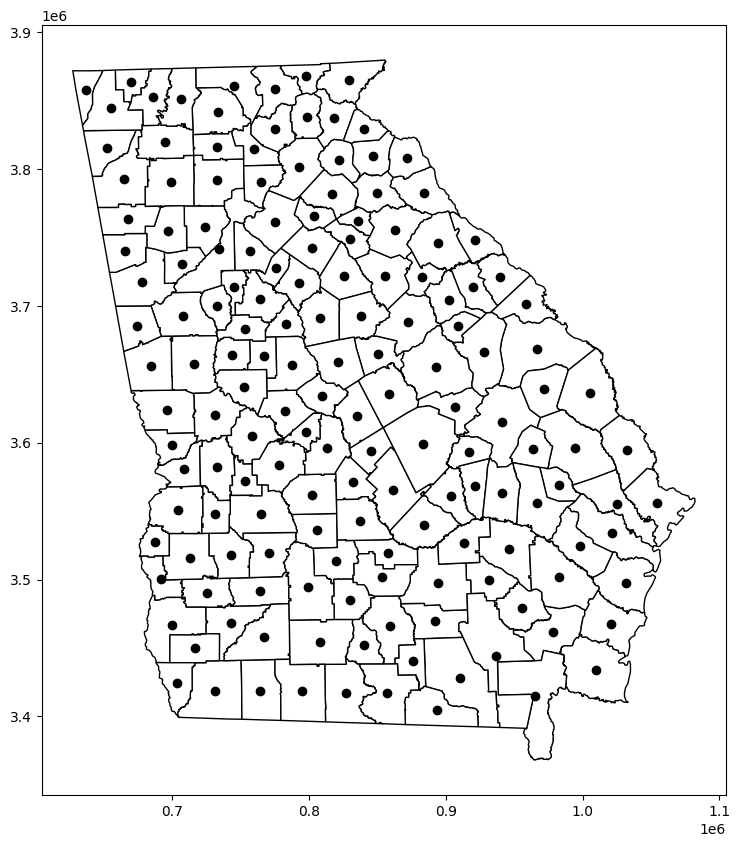

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
georgia_shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia_shp.centroid.plot(ax=ax, c='black')

In [ ]:
georgia_shp.head(2)

AREA  PERIMETER  G_UTM_  G_UTM_ID  Latitude  Longitud  TotPop90  \
0  1.331370e+09   207205.0     132       133  31.75339 -82.28558     15744   
1  8.929300e+08   154640.0     157       158  31.29486 -82.87474      6213   

   PctRural  PctBach  PctEld  PctFB  PctPov  PctBlack         X        Y  \
0      75.6      8.2   11.43   0.64    19.9     20.76  941396.6  3521764   
1     100.0      6.4   11.77   1.58    26.0     26.86  895553.0  3471916   

   AreaKey                                           geometry  
0    13001  POLYGON ((931869.062 3545540.500, 934111.625 3...  
1    13003  POLYGON ((867016.312 3482416.000, 884309.375 3...

In [ ]:
georgia_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AREA       159 non-null    float64 
 1   PERIMETER  159 non-null    float64 
 2   G_UTM_     159 non-null    int64   
 3   G_UTM_ID   159 non-null    int64   
 4   Latitude   159 non-null    float64 
 5   Longitud   159 non-null    float64 
 6   TotPop90   159 non-null    int64   
 7   PctRural   159 non-null    float64 
 8   PctBach    159 non-null    float64 
 9   PctEld     159 non-null    float64 
 10  PctFB      159 non-null    float64 
 11  PctPov     159 non-null    float64 
 12  PctBlack   159 non-null    float64 
 13  X          159 non-null    float64 
 14  Y          159 non-null    int64   
 15  AreaKey    159 non-null    int64   
 16  geometry   159 non-null    geometry
dtypes: float64(11), geometry(1), int64(5)
memory usage: 21.2 KB


In [ ]:
#Prepare Georgia dataset inputs
g_y = georgia_data['PctBach'].values.reshape((-1,1))
g_X = georgia_data[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia_data['X']
v = georgia_data['Y']
g_coords = list(zip(u,v))


In [ ]:
# estandarizar datos
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)
g_y = g_y.reshape((-1,1))
g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [ ]:
#Calibrate GWR model
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)

117.0


In [ ]:
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

In [ ]:
np.shape(gwr_results.params)

(159, 4)

In [ ]:
gwr_results.params[0:5]

array([[-0.23204579,  0.22820815,  0.05697445, -0.42649461],
       [-0.2792238 ,  0.16511734,  0.09516542, -0.41226348],
       [-0.248944  ,  0.20466991,  0.07121197, -0.42573638],
       [-0.23036768,  0.1527493 ,  0.0510379 , -0.35938659],
       [ 0.19066196,  0.71627541, -0.16920186, -0.24091753]])

In [ ]:
gwr_results.localR2[0:10]

array([[0.55932878],
       [0.5148705 ],
       [0.54751792],
       [0.50691577],
       [0.69062134],
       [0.69429812],
       [0.69813709],
       [0.70867337],
       [0.49985703],
       [0.49379842]])

In [ ]:
np.float = np.float64
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             71.793
Log-likelihood:                                                    -162.399
AIC:                                                                332.798
AICc:                                                               335.191
BIC:                                                               -713.887
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
georgia_shp['gwr_intercept'] = gwr_results.params[:,0]
georgia_shp['gwr_fb'] = gwr_results.params[:,1]
georgia_shp['gwr_aa'] = gwr_results.params[:,2]
georgia_shp['gwr_rural'] = gwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

<Axes: >

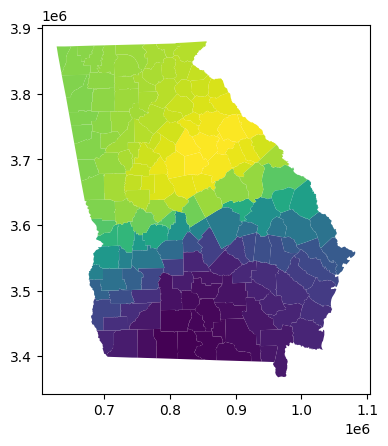

In [ ]:
georgia_shp.plot(column='gwr_intercept')

<Axes: >

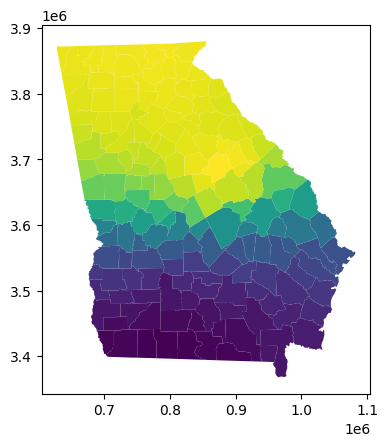

In [ ]:
georgia_shp.plot(column='gwr_fb')

<Axes: >

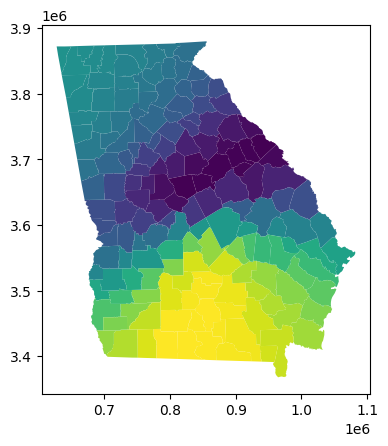

In [ ]:
georgia_shp.plot(column='gwr_aa')

<Axes: >

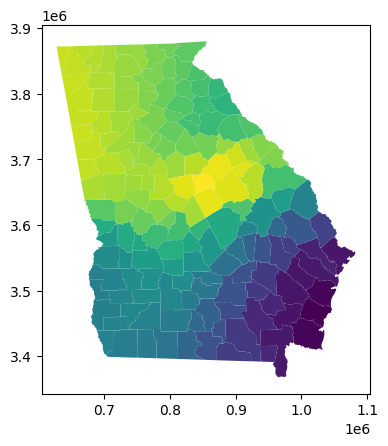

In [ ]:
georgia_shp.plot(column='gwr_rural')

### Regresión Ponderada Geográficamente Multiescala (MGWR)

In [ ]:
#Calibrate MGWR model

mgwr_selector = Sel_BW(g_coords, g_y, g_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(g_coords, g_y, g_X, mgwr_selector).fit()

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[ 92. 101. 136. 158.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             71.793
Log-likelihood:                                                    -162.399
AIC:                                                                332.798
AICc:                                                               335.191
BIC:                                                               -713.887
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
georgia_shp['mgwr_intercept'] = mgwr_results.params[:,0]
georgia_shp['mgwr_fb'] = mgwr_results.params[:,1]
georgia_shp['mgwr_aa'] = mgwr_results.params[:,2]
georgia_shp['mgwr_rural'] = mgwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

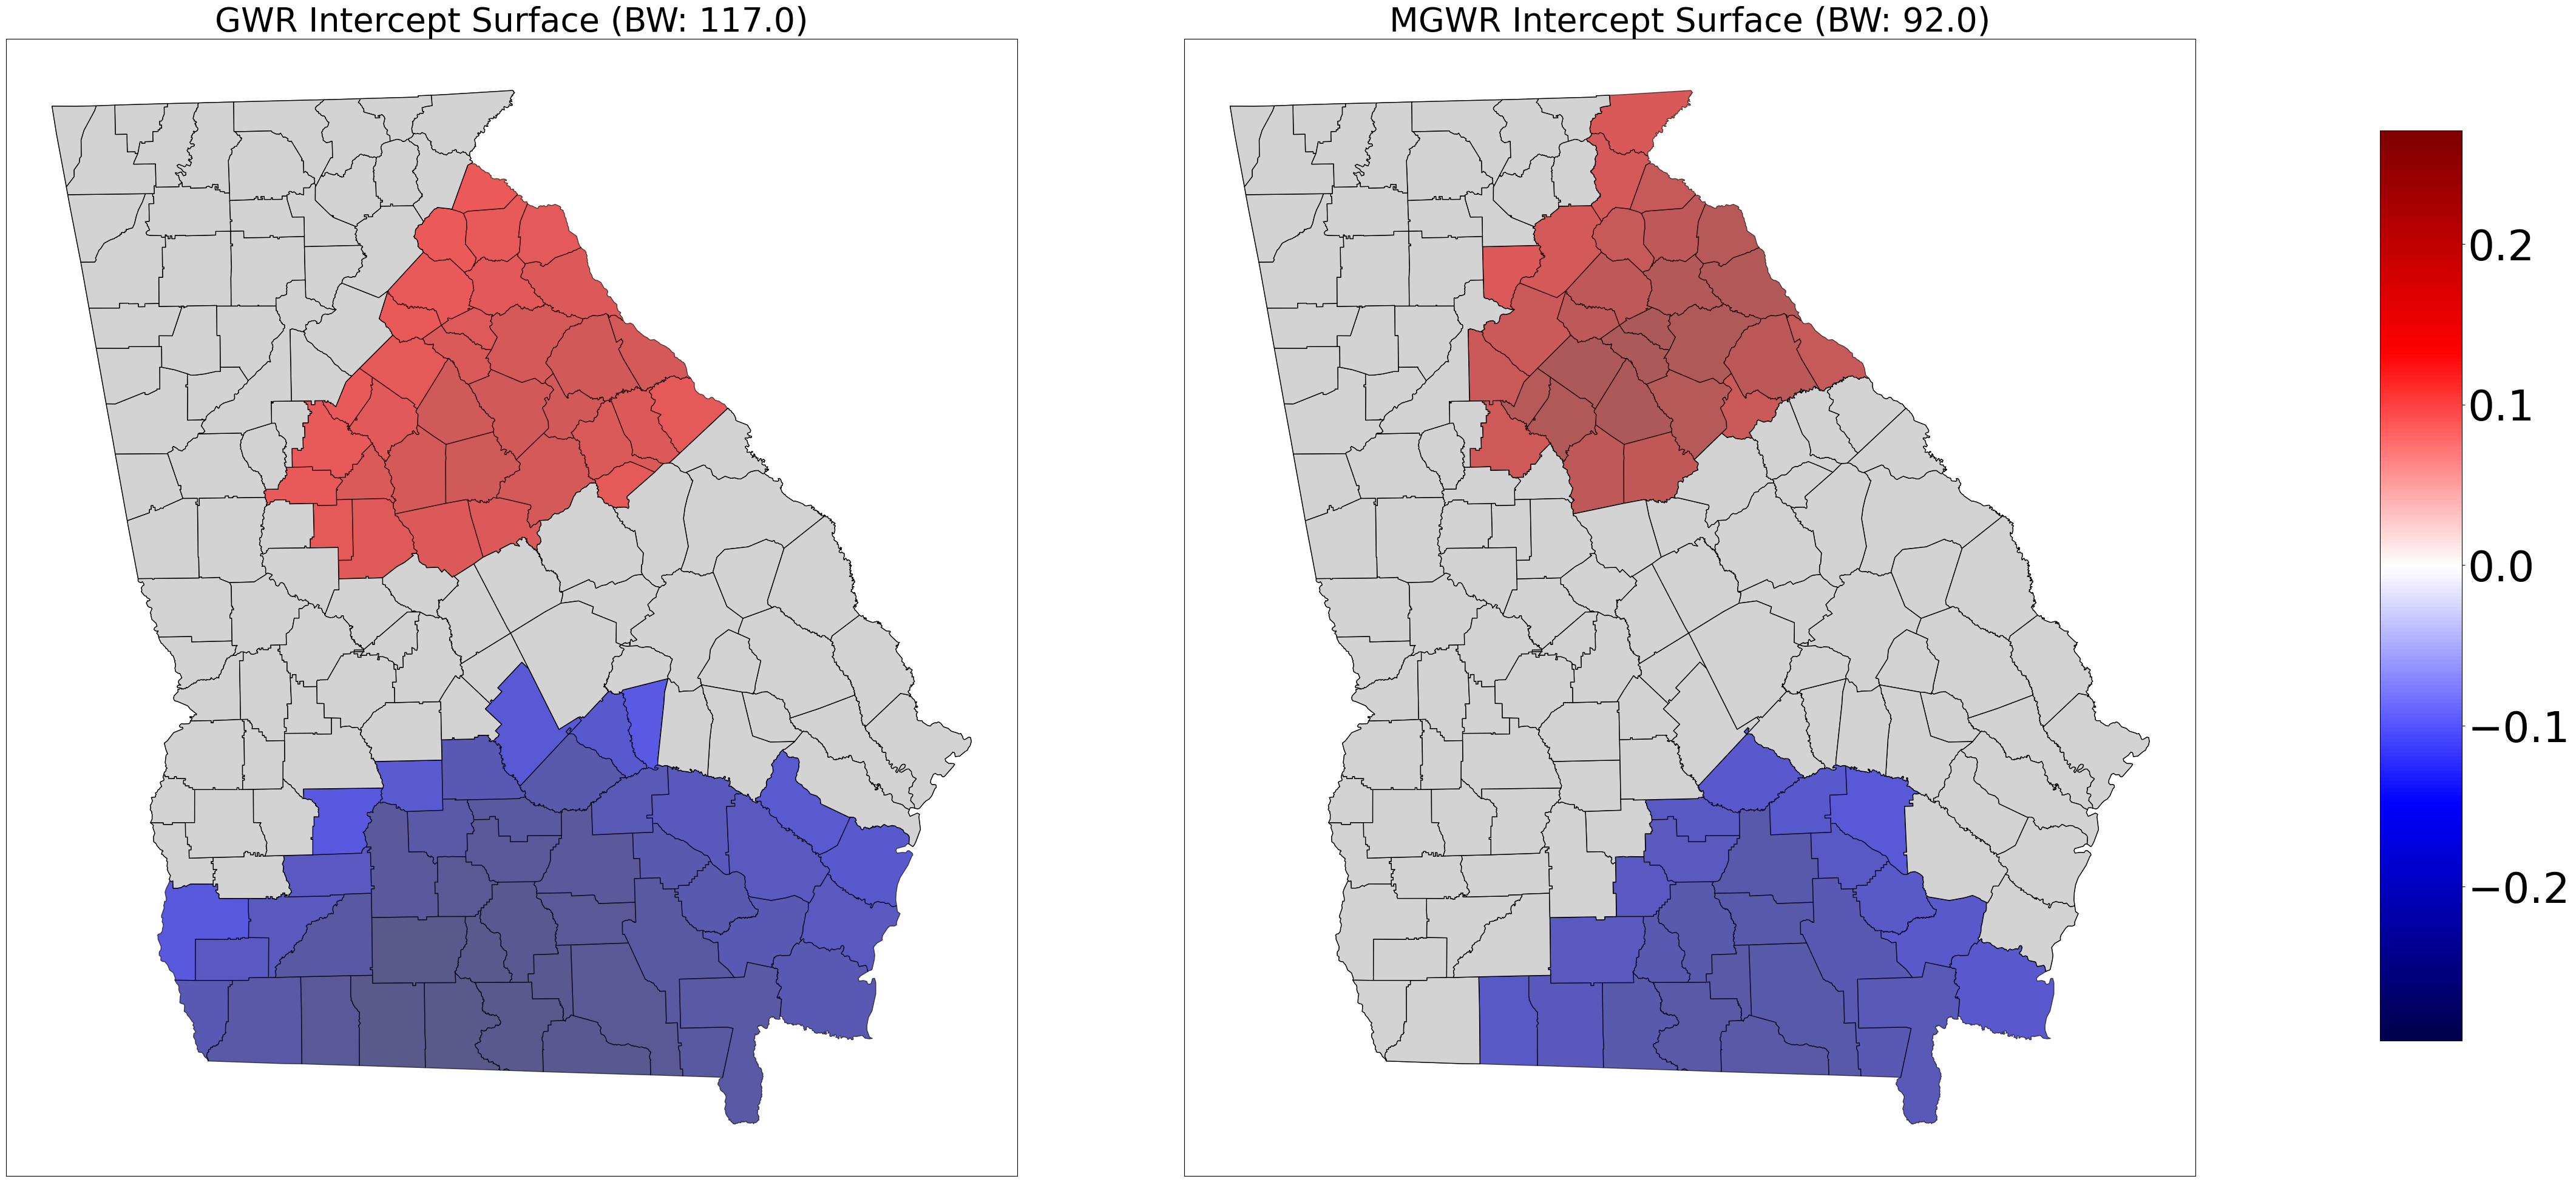

In [ ]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

from mgwr.utils import shift_colormap, truncate_colormap

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Intercept Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Intercept Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = georgia_shp['gwr_intercept'].min()
gwr_max = georgia_shp['gwr_intercept'].max()
mgwr_min = georgia_shp['mgwr_intercept'].min()
mgwr_max = georgia_shp['mgwr_intercept'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
georgia_shp.plot('gwr_intercept', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    georgia_shp[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
georgia_shp.plot('mgwr_intercept', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    georgia_shp[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

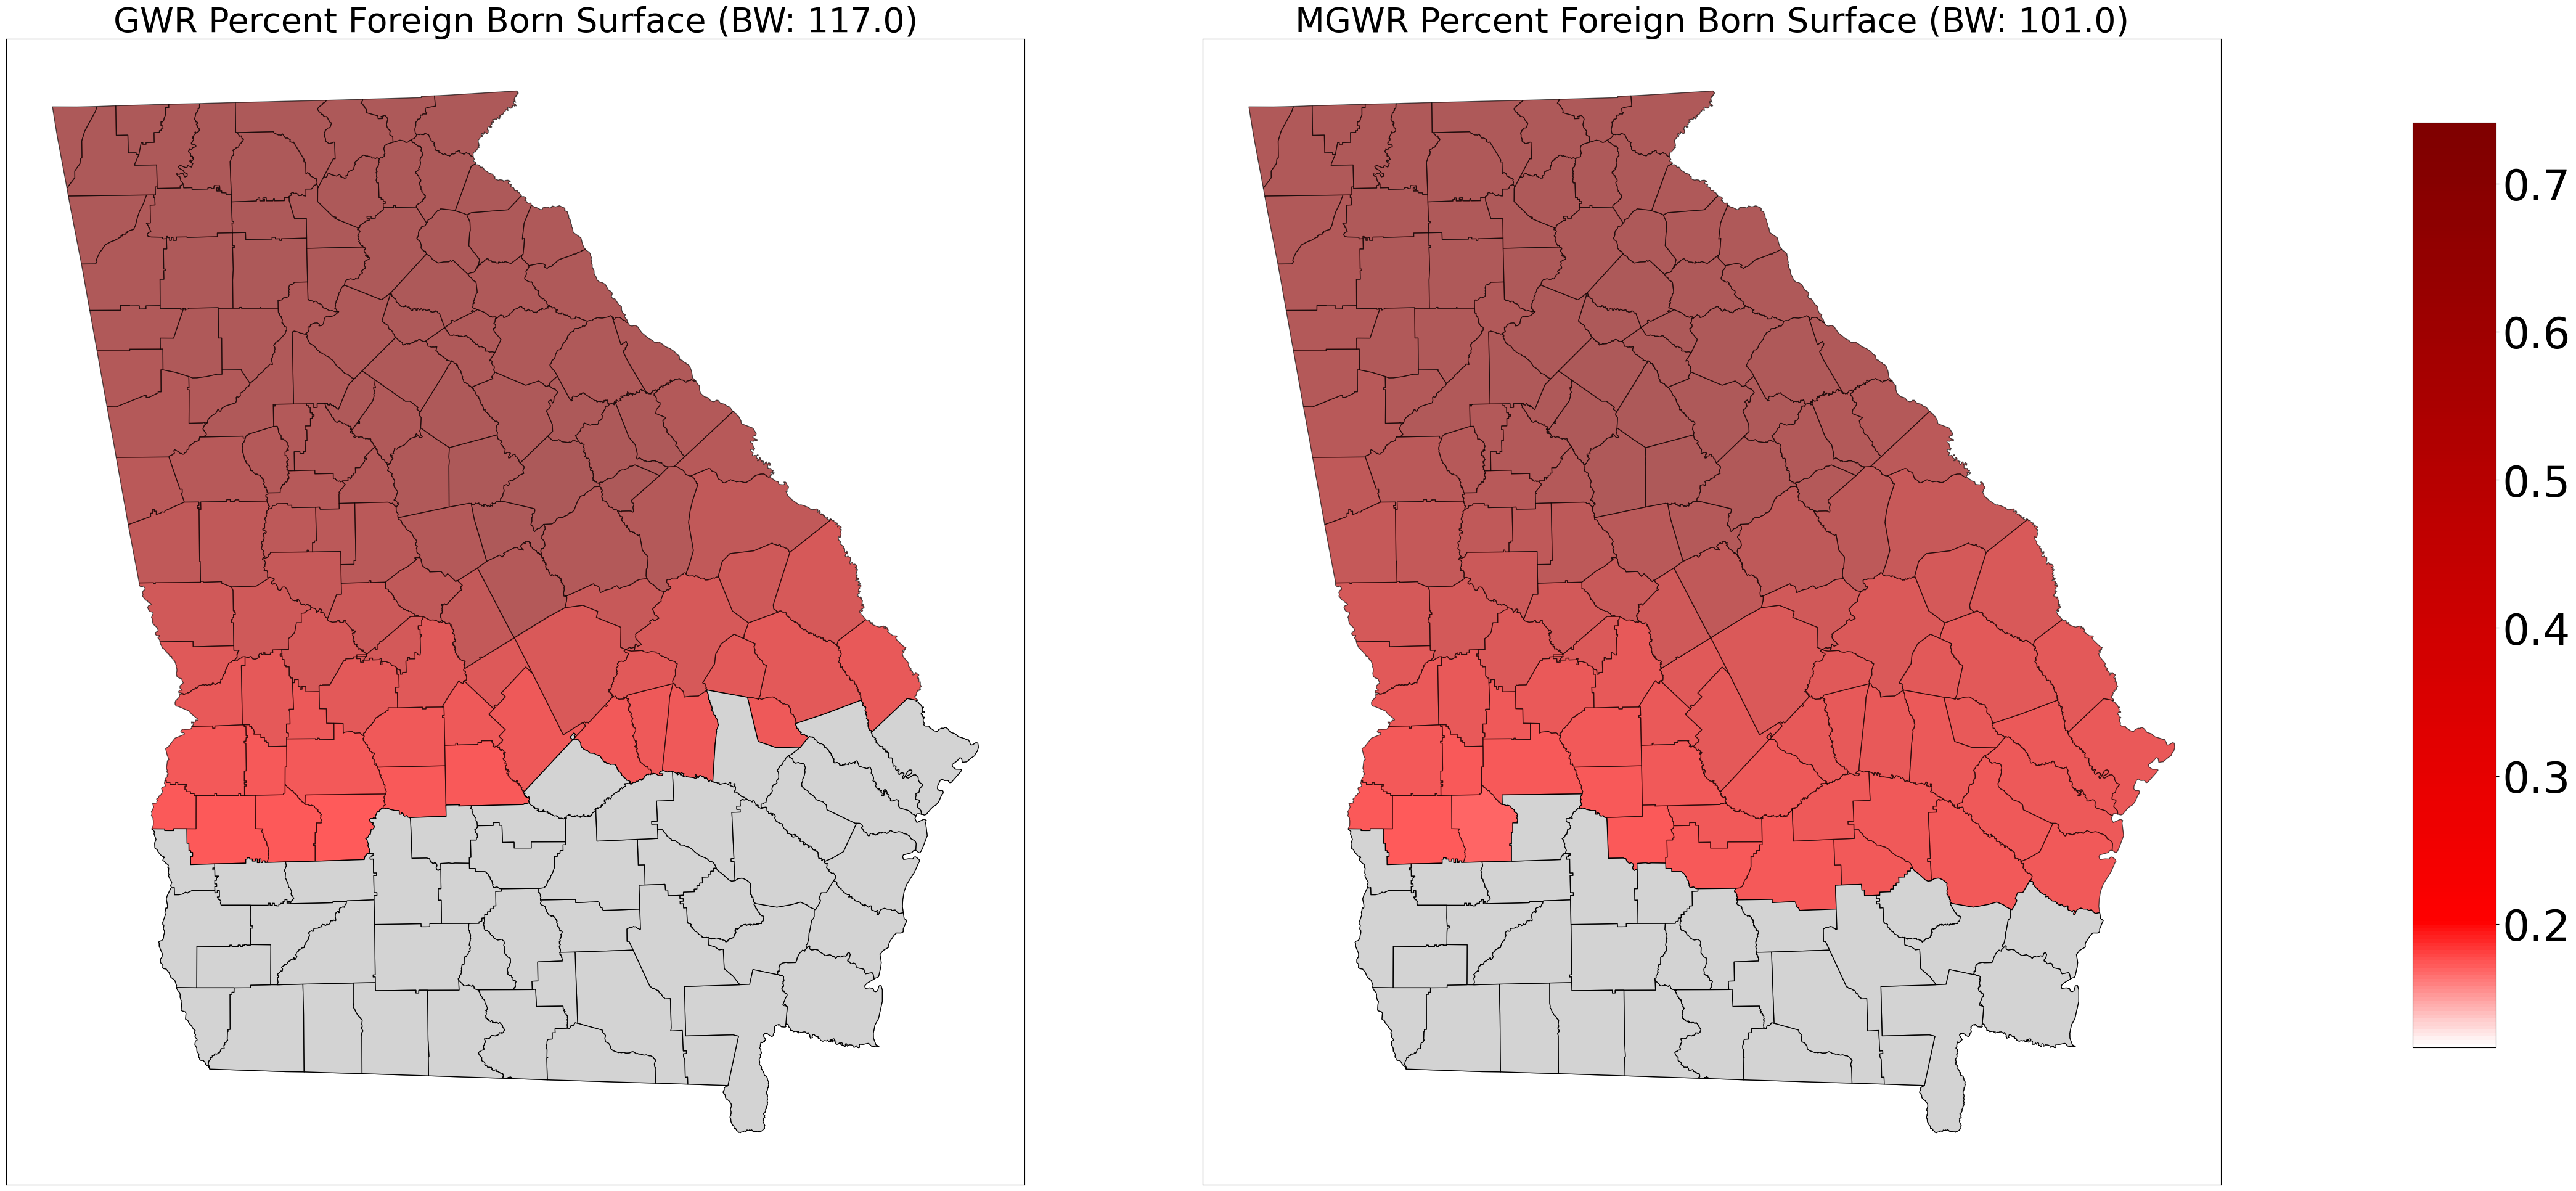

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Percent Foreign Born Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Percent Foreign Born Surface (BW: ' + str(mgwr_bw[1]) +')', fontsize=40)
cmap = plt.cm.seismic
gwr_min = georgia_shp['gwr_fb'].min()
gwr_max = georgia_shp['gwr_fb'].max()
mgwr_min = georgia_shp['mgwr_fb'].min()
mgwr_max = georgia_shp['mgwr_fb'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)

# Cambiar el nombre del colormap para evitar duplicados
cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1., name="shiftedcmap_" + str(np.random.randint(1000)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

georgia_shp.plot('gwr_fb', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
if (gwr_filtered_t[:,1] == 0).any():
    georgia_shp[gwr_filtered_t[:,1] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

georgia_shp.plot('mgwr_fb', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
if (mgwr_filtered_t[:,1] == 0).any():
    georgia_shp[mgwr_filtered_t[:,1] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})

    
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

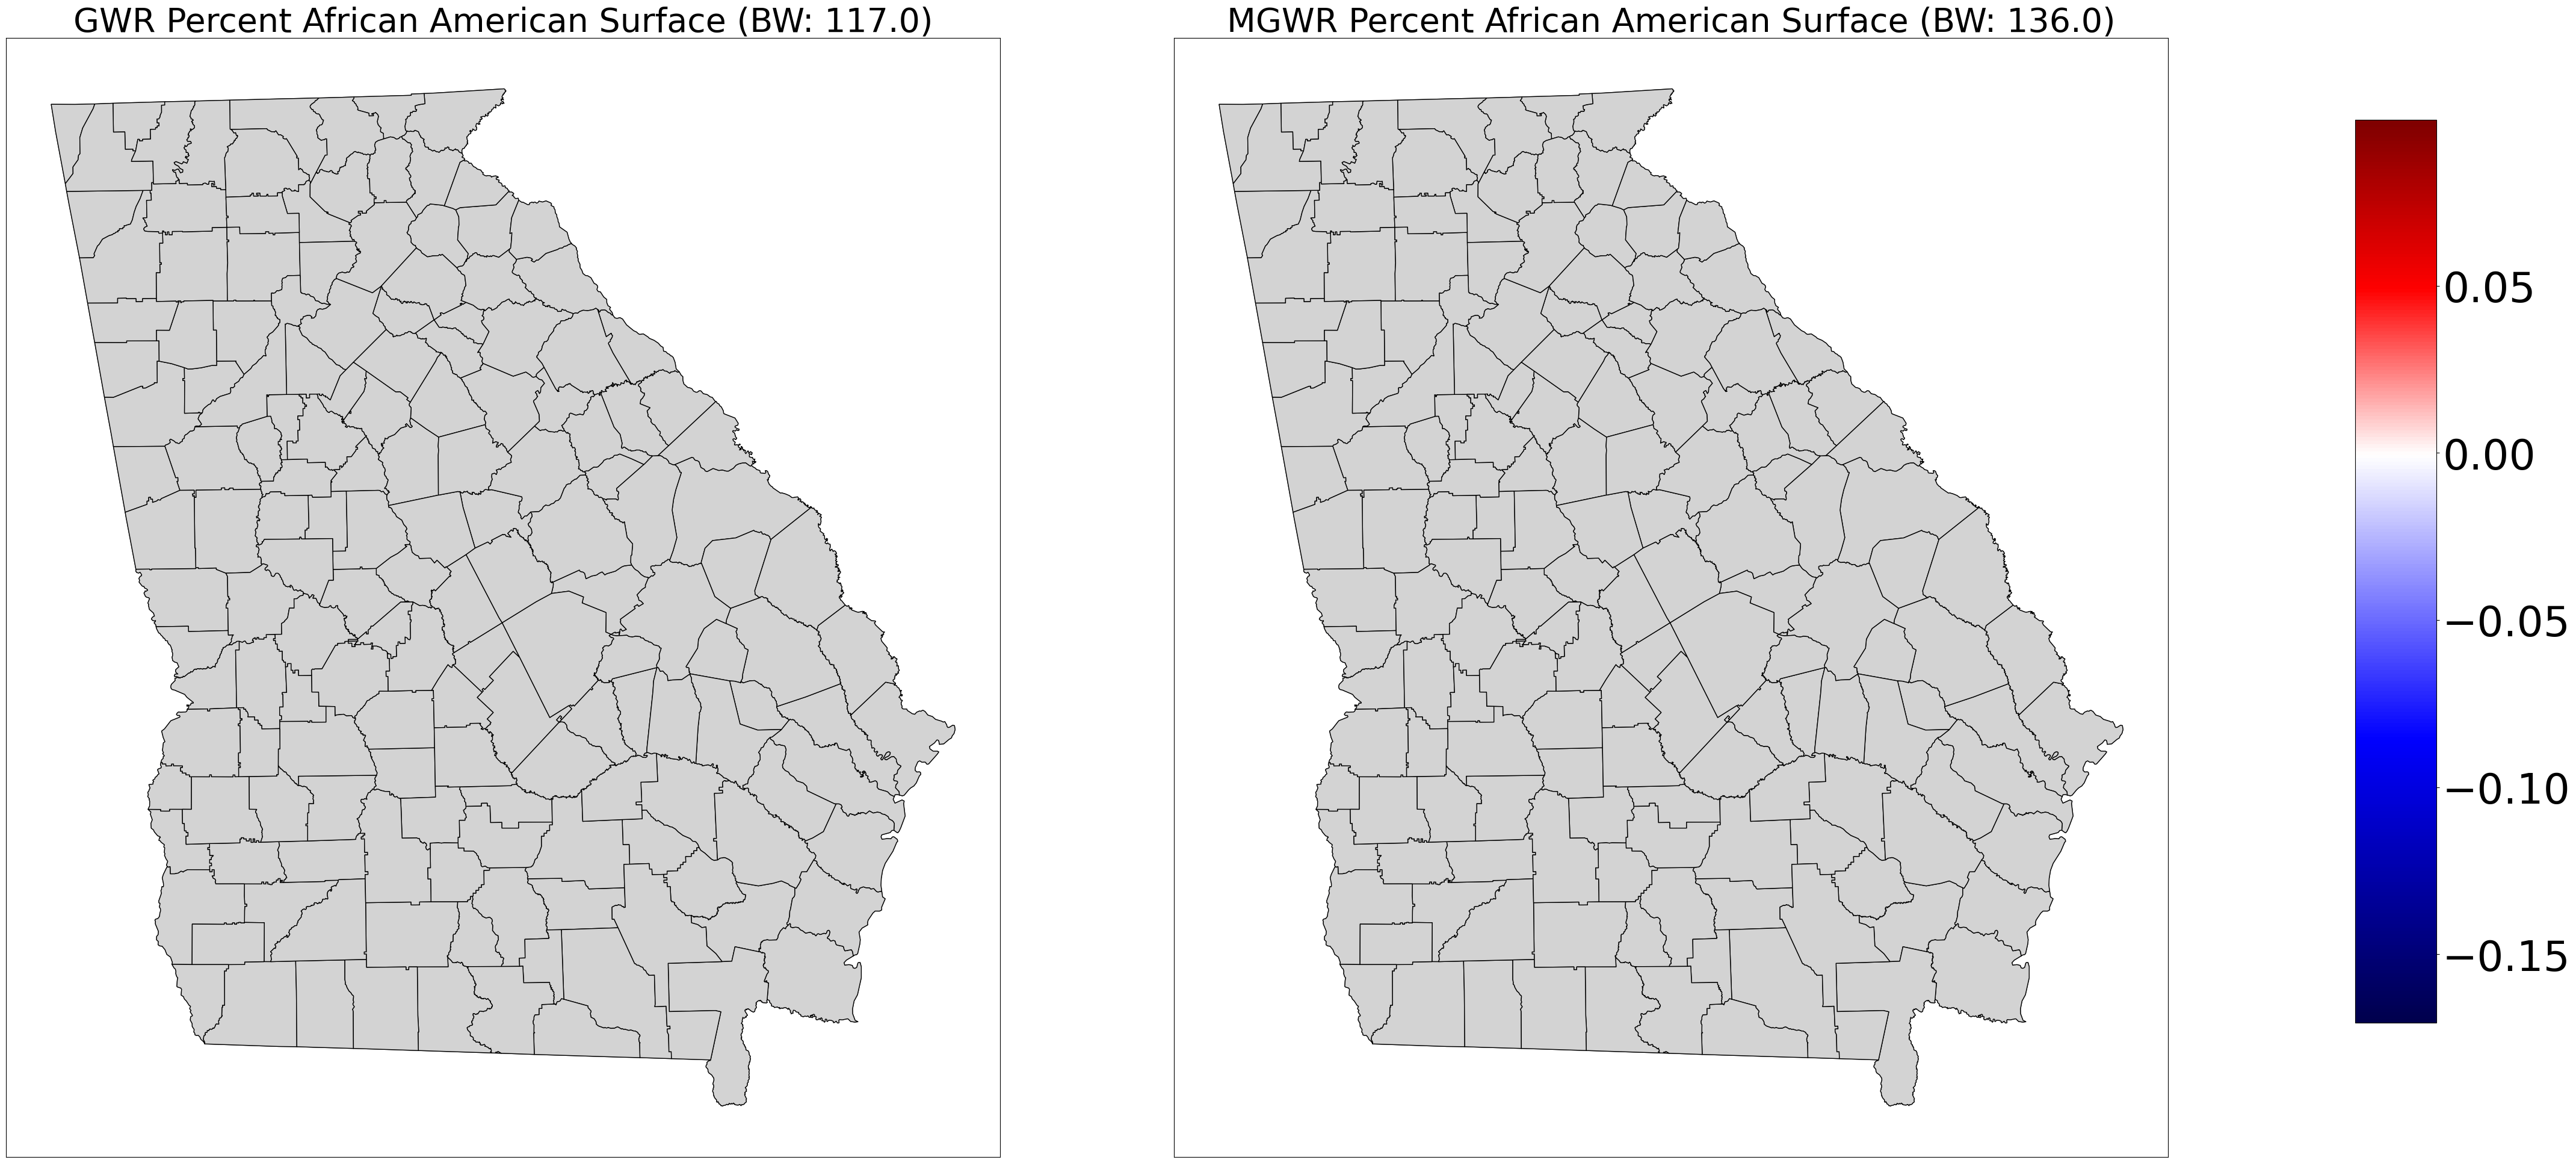

In [ ]:

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45, 20))

# Títulos para cada gráfico
ax0 = axes[0]
ax0.set_title('GWR Percent African American Surface (BW: ' + str(gwr_bw) + ')', fontsize=40)

ax1 = axes[1]
ax1.set_title('MGWR Percent African American Surface (BW: ' + str(mgwr_bw[2]) + ')', fontsize=40)

# Colormap inicial
cmap = plt.cm.seismic

# Definir valores mínimos y máximos
gwr_min = georgia_shp['gwr_aa'].min()
gwr_max = georgia_shp['gwr_aa'].max()
mgwr_min = georgia_shp['mgwr_aa'].min()
mgwr_max = georgia_shp['mgwr_aa'].max()

vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

# Ajustar el colormap basado en los valores
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
else:
    # Cambiar el nombre del colormap para evitar duplicados
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax / (vmax + abs(vmin)), stop=1., name="shiftedcmap_" + str(np.random.randint(1000)))

# Crear el ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Graficar el mapa de GWR
georgia_shp.plot('gwr_aa', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor': 'black', 'alpha': .65})
if (gwr_filtered_t[:, 2] == 0).any():
    georgia_shp[gwr_filtered_t[:, 2] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor': 'black'})

# Graficar el mapa de MGWR
georgia_shp.plot('mgwr_aa', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor': 'black', 'alpha': .65})
if (mgwr_filtered_t[:, 2] == 0).any():
    georgia_shp[mgwr_filtered_t[:, 2] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor': 'black'})

# Ajustar el diseño de la figura
fig.tight_layout()
fig.subplots_adjust(right=0.9)

# Añadir la barra de colores
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50)

# Ocultar ejes
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Mostrar la figura
plt.show()

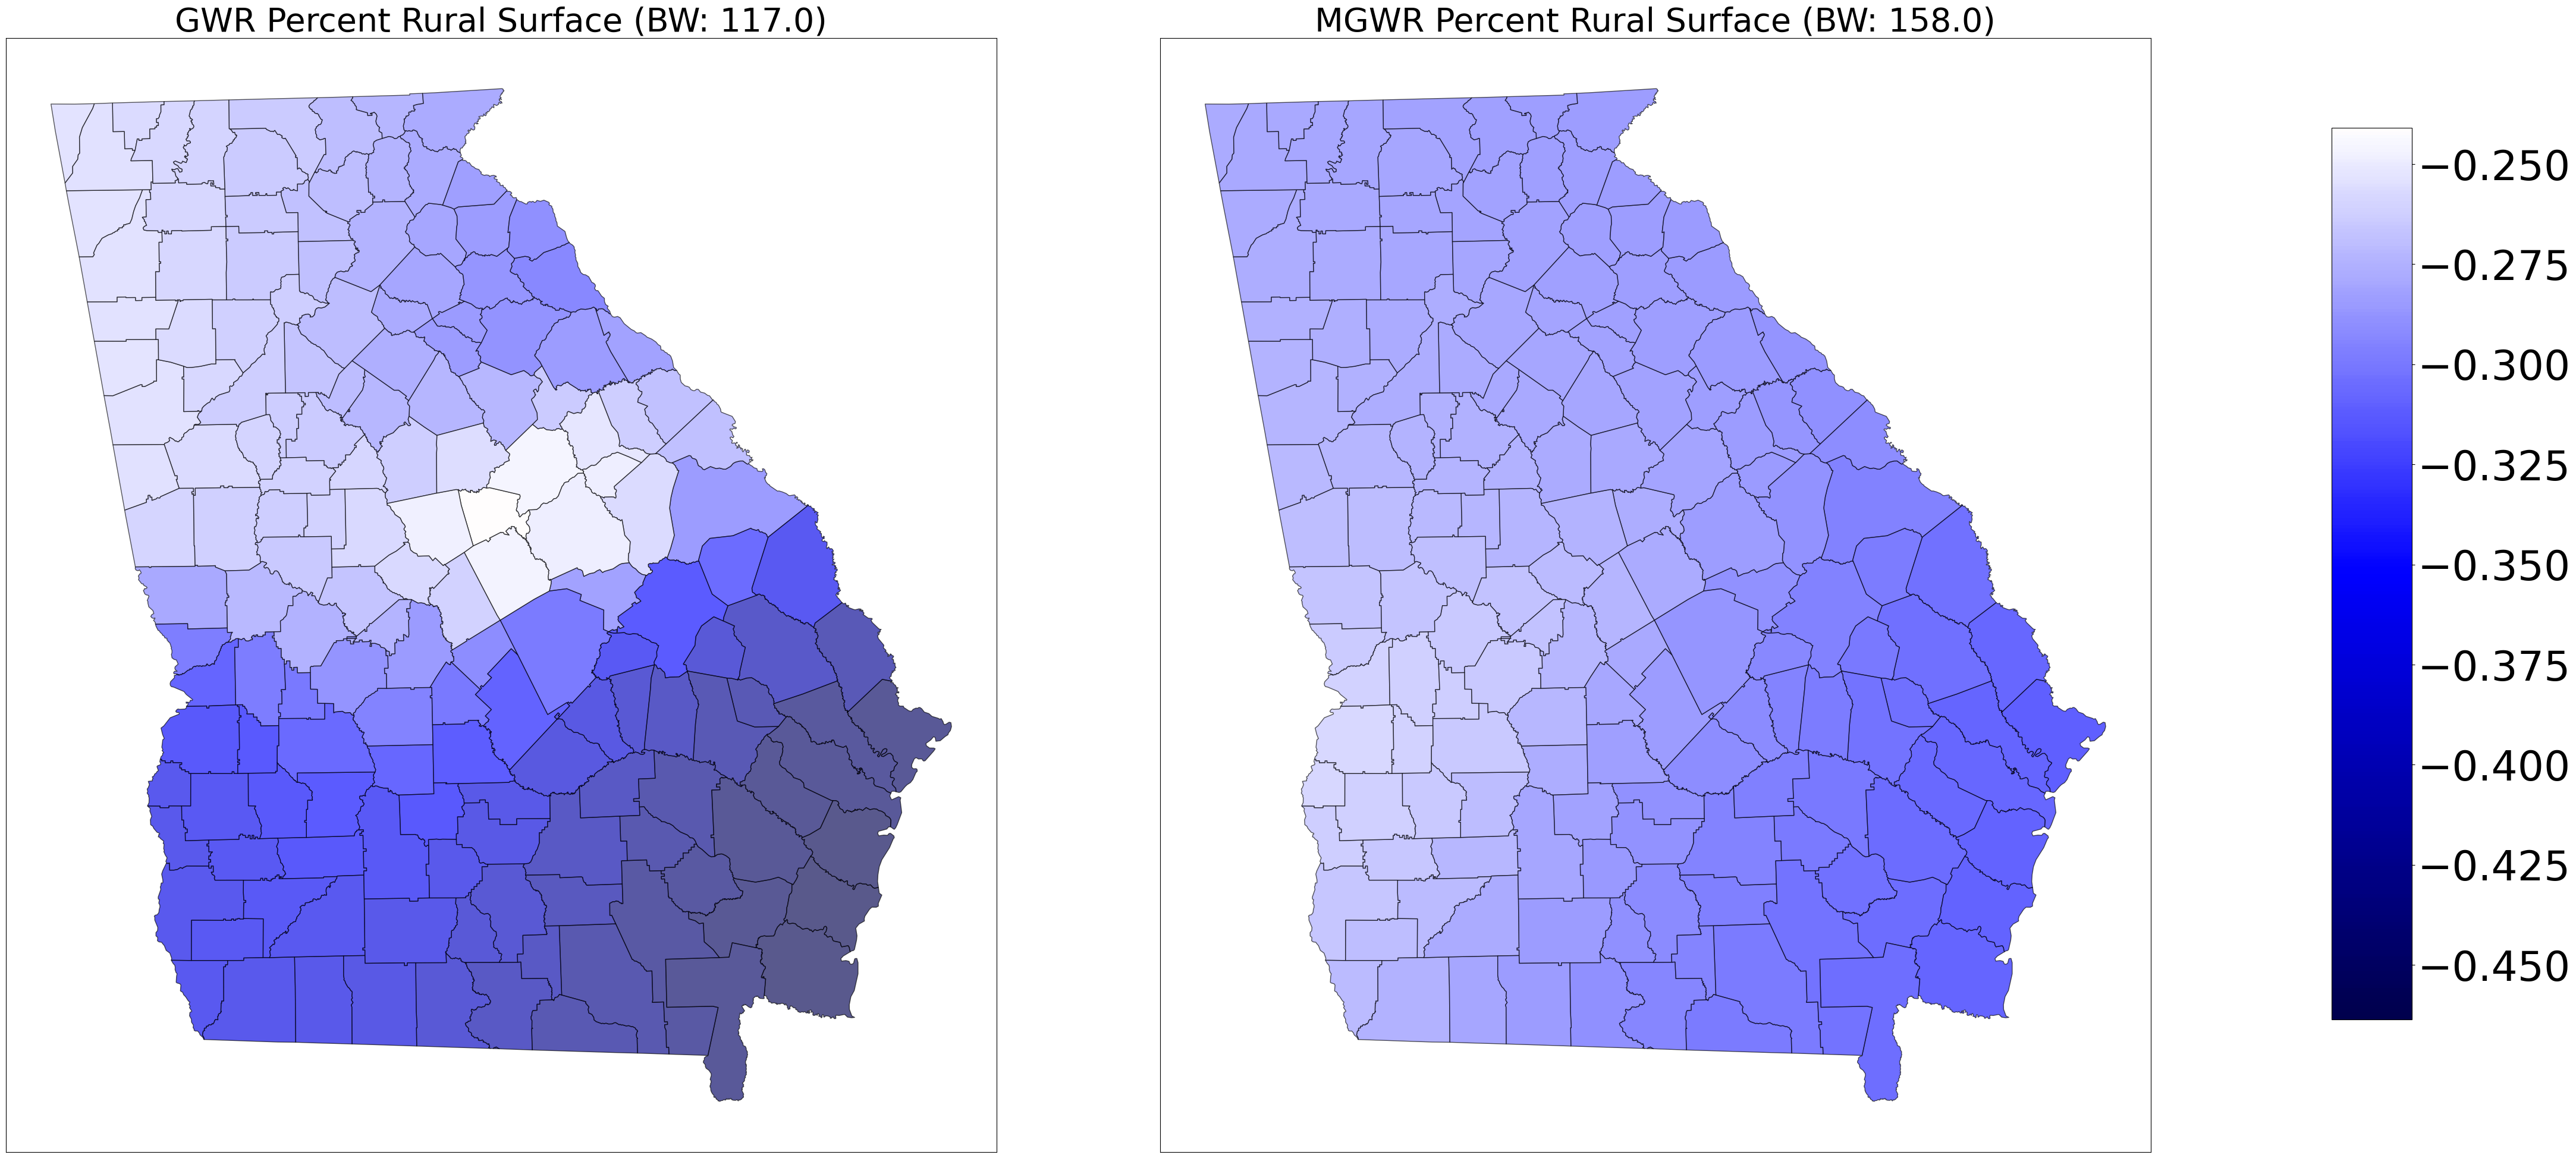

In [ ]:
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45, 20))

# Títulos para cada gráfico
ax0 = axes[0]
ax0.set_title('GWR Percent Rural Surface (BW: ' + str(gwr_bw) + ')', fontsize=40)

ax1 = axes[1]
ax1.set_title('MGWR Percent Rural Surface (BW: ' + str(mgwr_bw[3]) + ')', fontsize=40)

# Colormap inicial
cmap = plt.cm.seismic

# Definir valores mínimos y máximos
gwr_min = georgia_shp['gwr_rural'].min()
gwr_max = georgia_shp['gwr_rural'].max()
mgwr_min = georgia_shp['mgwr_rural'].min()
mgwr_max = georgia_shp['mgwr_rural'].max()

vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

# Ajustar el colormap basado en los valores
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
else:
    # Cambiar el nombre del colormap para evitar duplicados
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax / (vmax + abs(vmin)), stop=1., name="shiftedcmap_" + str(np.random.randint(1000)))

# Crear el ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Graficar el mapa de GWR
georgia_shp.plot('gwr_rural', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor': 'black', 'alpha': .65})
if (gwr_filtered_t[:, 3] == 0).any():
    georgia_shp[gwr_filtered_t[:, 3] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor': 'black'})

# Graficar el mapa de MGWR
georgia_shp.plot('mgwr_rural', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor': 'black', 'alpha': .65})
if (mgwr_filtered_t[:, 3] == 0).any():
    georgia_shp[mgwr_filtered_t[:, 3] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor': 'black'})

# Ajustar el diseño de la figura
fig.tight_layout()
fig.subplots_adjust(right=0.9)

# Añadir la barra de colores
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50)

# Ocultar ejes
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Mostrar la figura
plt.show()


También es posible probar la significancia estadística de cada superficie de estimaciones de parámetros producidas por GWR a través de métodos de Monte Carlo. La prueba de variabilidad espacial mezcla las observaciones en el espacio, recalibra GWR en los datos aleatorizados manteniendo constante la especificación del modelo, y luego calcula la variabilidad de las estimaciones de parámetros resultantes para cada superficie. Este proceso se repite y el número de veces que la variabilidad de cada superficie de los datos aleatorizados es mayor que la variabilidad de cada superficie original se utiliza para construir pseudo valores p para pruebas de hipótesis. Un pseudo valor-p menor que 0.05 indica que la variabilidad espacial observada de una superficie de coeficientes es significativa al nivel de confianza del 95% (es decir, no aleatoria).


In [ ]:
#Visualizing hypothesis tests for significance of parameter~estimates
#Manually set bandwidth to 107 and fit
gwr_model = GWR(g_coords, g_y, g_X, 107)
gwr_results = gwr_model.fit()

#default is 1000 iterations
p_vals_1000 = gwr_results.spatial_variability(gwr_selector)
print(p_vals_1000)

[0.002 0.091 0.166 0.553]
